In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from random import *

import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:


class Mnist(nn.Module):

    def __init__(self):
        super(Mnist, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        return x
    
net = Mnist()
print(net)


Mnist(
  (fc1): Linear(in_features=784, out_features=100)
  (fc2): Linear(in_features=100, out_features=10)
)


## Test our network with random data and get it to learn something

In [3]:
input = Variable(torch.randn(1, 1, 784))
target = Variable(torch.arange(1, 11))  

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss)
loss.backward() # calculate gradient
optimizer.step() # update weight


before optimize Variable containing:
 33.1449
[torch.FloatTensor of size 1]



In [4]:
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss) # it number is smaller than before, therefore the network is learning something


after optimize Variable containing:
 32.8418
[torch.FloatTensor of size 1]



In [5]:
#we can trace the loss.grade_fn backwards through the network.
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="../data")


In [7]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [8]:
len(mnist.data)

70000

In [9]:
len(mnist.target)

70000

In [10]:
len(mnist.data[0])

784

(array([ 6903.,  7877.,  6990.,  7141.,  6824.,  6313.,  6876.,  7293.,
        13783.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

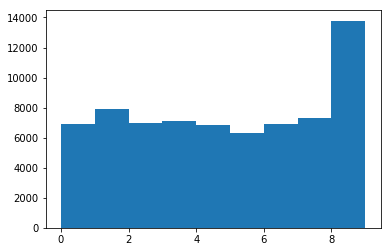

In [11]:
plt.hist(mnist.target, bins=range(10))

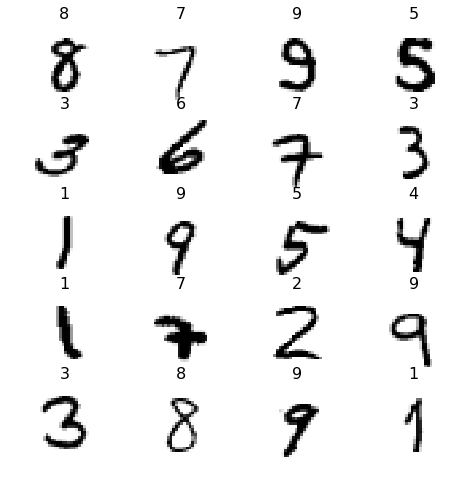

In [20]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    idx = randint(0, 70000)
    img =  mnist.data[idx].reshape((28,28))
    sp = fig.add_subplot(rows, columns , i)
    sp.axis('Off')
    sp.set_title(int(mnist.target[idx]), fontsize=16)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray_r')



In [8]:
x = np.random.permutation(70000)

In [9]:
training_data_index = x[:50000]
validation_data_index = x[50000:60000]
test_data_index = x[60000:]

In [10]:
bs = 5
bs_data_index = training_data_index[:3]
bs_data_index

array([43900, 34921, 20914])

In [29]:
net( tourch.array(mnist.data[0]).reshape((1,1,28,28)))

NameError: name 'tourch' is not defined

In [26]:
len(mnist.data[0])

784

In [27]:
28*28

784

## single image training

In [43]:
net = Mnist()
numbers = np.arange(10)

input_tensor = torch.from_numpy(np.array(mnist.data[0]).reshape(1,1,784))
target_tensor = torch.from_numpy((numbers == mnist.target[0]).astype(int).reshape(1,1,10))

input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss, output)
loss.backward() # calculate gradient
optimizer.step() # update weight

output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss, output)


before optimize Variable containing:
 0.2409
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.5648  0.5061  0.4849  0.5984  0.3762  0.4369  0.5780  0.4977  0.4757

Columns 9 to 9 
   0.4793
[torch.FloatTensor of size 1x1x10]

after optimize Variable containing:
 0.2210
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.5637  0.4708  0.4913  0.5388  0.3582  0.4601  0.5194  0.4621  0.4586

Columns 9 to 9 
   0.4820
[torch.FloatTensor of size 1x1x10]



In [57]:
net = Mnist()
numbers = np.arange(10)

i1, i2 = np.array(mnist.data[0]), np.array(mnist.data[50000])
t1, t2 = (numbers == mnist.target[0]).astype(int), (numbers == mnist.target[50000]).astype(int)
input_tensor  = torch.from_numpy(np.concatenate((i1, i2)).reshape(2,1,784))
target_tensor = torch.from_numpy(np.concatenate((t1, t2)).reshape(2,1,10))

input = torch.autograd.Variable(input_tensor).type(torch.FloatTensor)
target = torch.autograd.Variable(target_tensor).type(torch.FloatTensor)

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()   
output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('before optimize', loss, output)
loss.backward() # calculate gradient
optimizer.step() # update weight

output = net(input)
criterion = nn.MSELoss()
loss = criterion(output, target)
print('after optimize', loss, output)


before optimize Variable containing:
 0.2395
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.5245  0.4319  0.3781  0.3933  0.3861  0.6101  0.4688  0.4520  0.5474

Columns 9 to 9 
   0.4132

(1 ,.,.) = 

Columns 0 to 8 
   0.4420  0.5664  0.3824  0.5097  0.5157  0.6091  0.6482  0.3604  0.4361

Columns 9 to 9 
   0.4876
[torch.FloatTensor of size 2x1x10]

after optimize Variable containing:
 0.2273
[torch.FloatTensor of size 1]
 Variable containing:
(0 ,.,.) = 

Columns 0 to 8 
   0.5131  0.3935  0.3450  0.3782  0.3683  0.5805  0.4600  0.4349  0.5226

Columns 9 to 9 
   0.4220

(1 ,.,.) = 

Columns 0 to 8 
   0.4167  0.5272  0.3855  0.5115  0.5534  0.5811  0.6147  0.3644  0.4252

Columns 9 to 9 
   0.4695
[torch.FloatTensor of size 2x1x10]



In [102]:
def get_batch(idxs, bs = 100):
    numbers = np.arange(10)
    print('idxs', len(idxs))
    for i in range(0, len(idxs)//bs):        
        yield [ ( idxs[j], \
                   np.array(mnist.data[idxs[j]]), \
                   (numbers == mnist.target[idxs[j]]).astype(int)\
                 ) for j in range(i*bs, (i+1)*bs)]

idxs 70
show images (array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
show images (array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))
show images (array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))
show images (array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))
show images (array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 0, 0, 0,

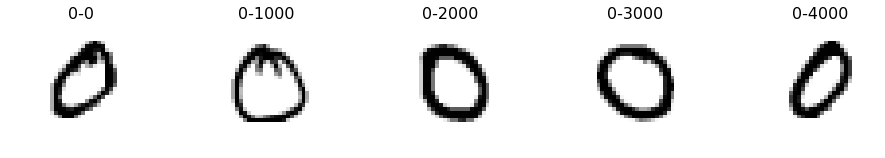

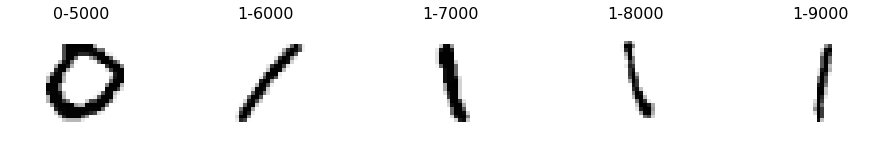

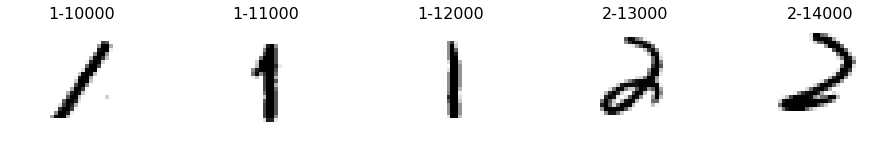

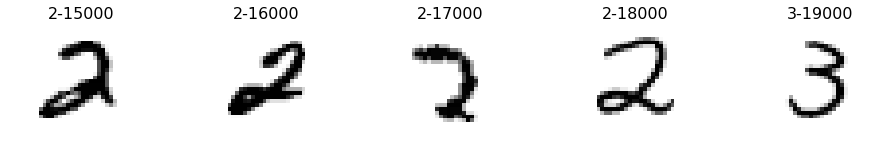

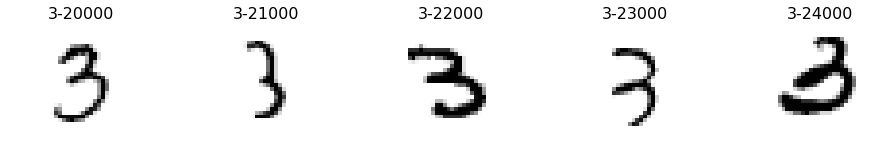

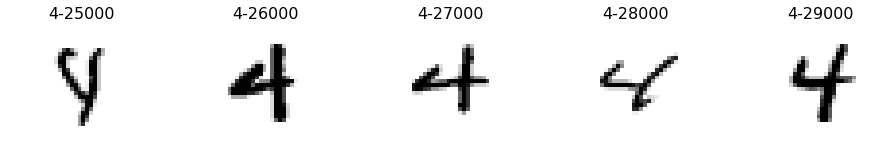

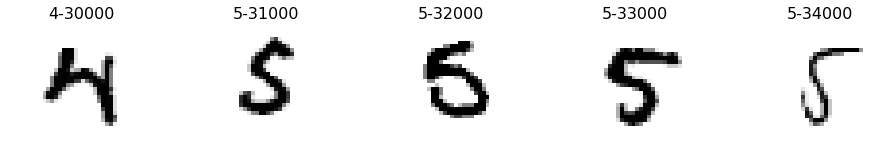

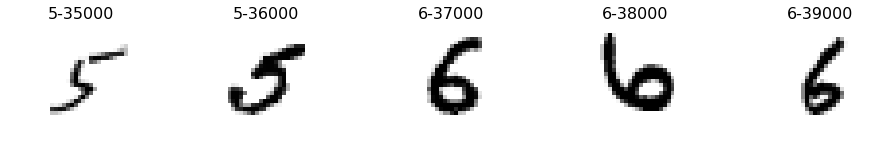

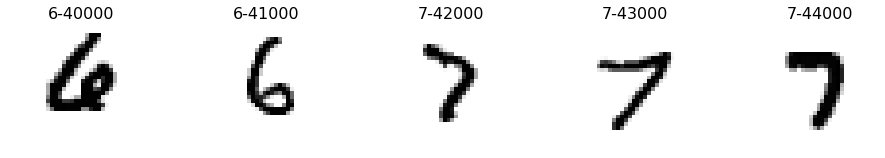

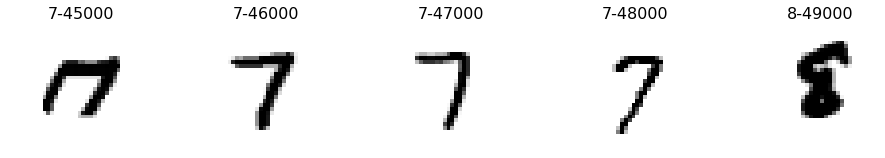

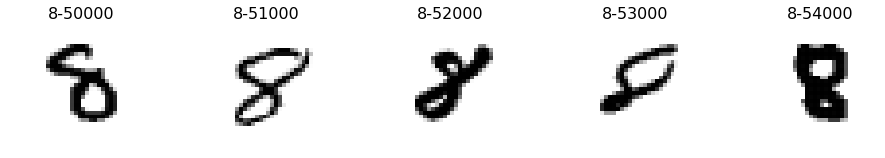

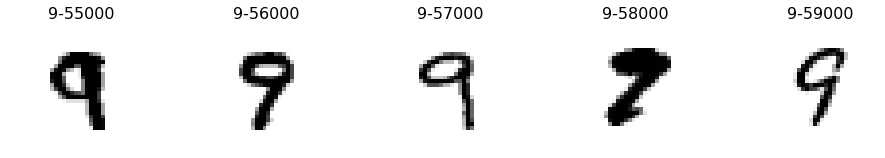

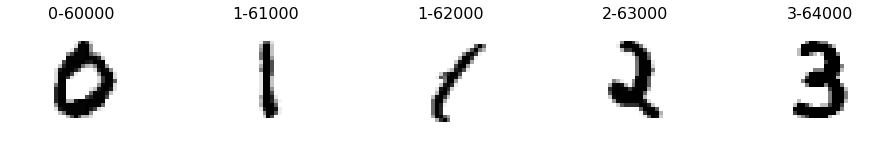

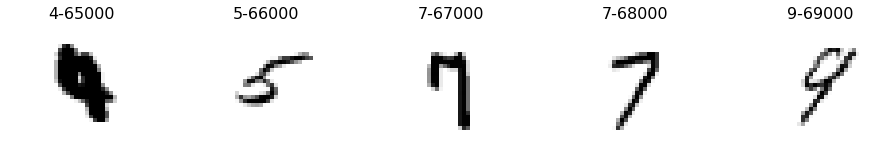

In [106]:
def show_batch(idxs):
    w=10
    h=10
    columns = 5
    rows = len(idxs)//columns
    fig=plt.figure(figsize=(16, rows*2))
    for i in range(1, columns*rows +1):
        idx = idxs[i-1]
        img =  mnist.data[idx].reshape((28,28))
        sp = fig.add_subplot(rows, columns , i)
        sp.axis('Off')
        sp.set_title(str(int(mnist.target[idx]))+'-'+str(idx), fontsize=16)
        fig.add_subplot(rows, columns, i) 
        plt.imshow(img, cmap='gray_r')
        
for b in get_batch(range(0,70000,1000), bs=5):
    zipb = list(zip(*b))
    print('show images', zipb[2])
    show_batch(zipb[0])
    #show_batch(range(0,70000,1000))        


In [92]:
!git gui